In [1]:
#importing the libraiers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sci
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_excel('cdv.xlsx')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


The dataset contains 303 rows and 14 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The dataset dont have any null columns and all the variables are in the datatype integer except oldpeak which is of datatype float

In [5]:
# Check for duplicates
duplicates = df.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 1


In [6]:
# droping duplicates
df.drop_duplicates(inplace=True)

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [71]:
#preliminary statistical summary of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


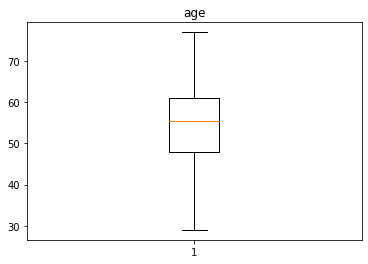

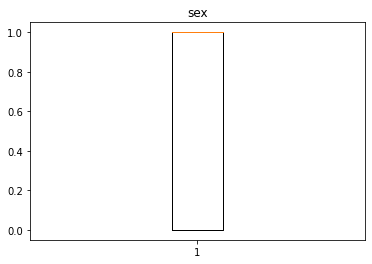

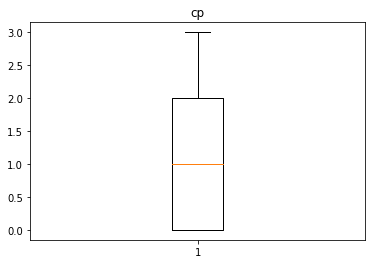

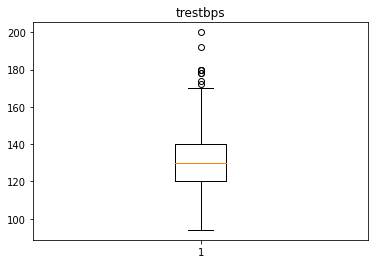

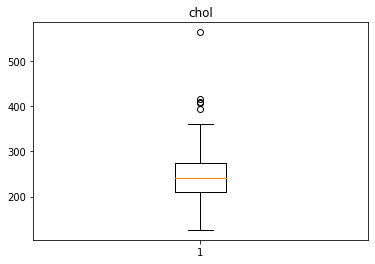

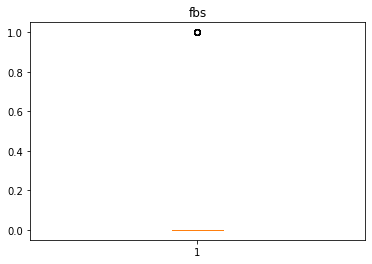

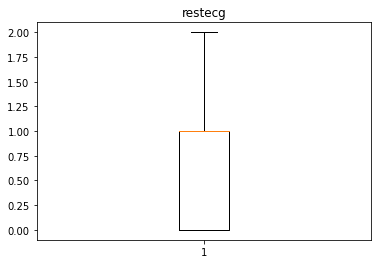

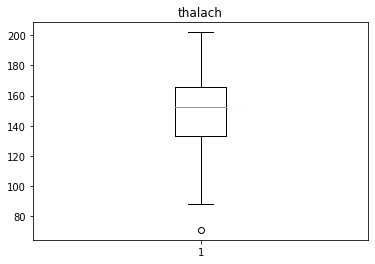

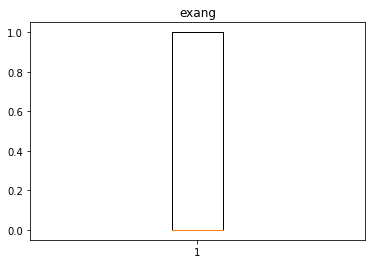

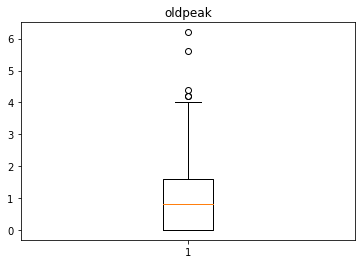

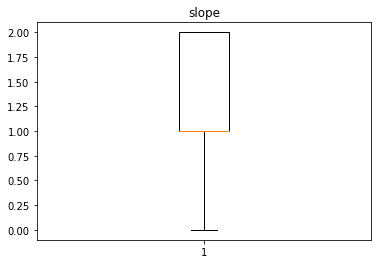

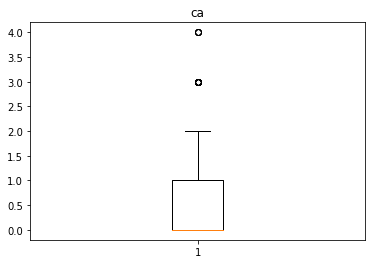

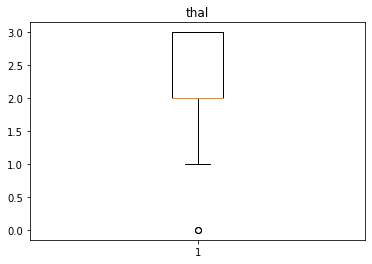

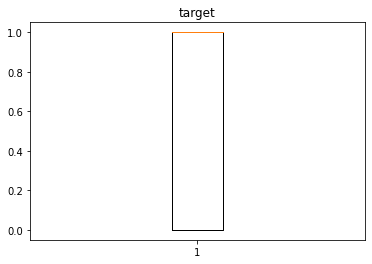

In [70]:
# Creating  box plots for all variables in the DataFrame
for col in df.columns:
    if df[col].dtype != 'object':
        plt.figure()
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()
    

# occurrence of CVD across the Age category

since the dataset is small we can't discard the outliers , we treat outliers as potential observations

In [24]:
cvd_age = df.groupby('age')['target'].sum()

<AxesSubplot:xlabel='age'>

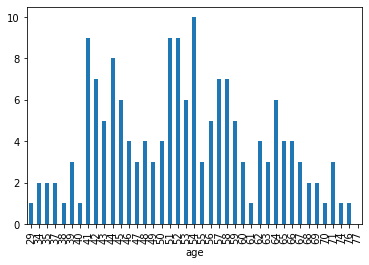

In [25]:
cvd_age.plot(kind = 'bar')


#  exploring categorical data

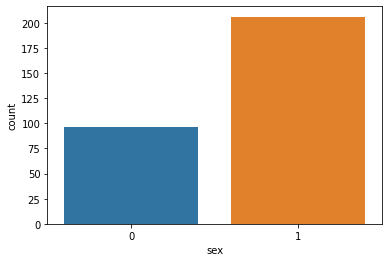

In [20]:
sns.countplot(x="sex", data=df);

<AxesSubplot:xlabel='cp', ylabel='count'>

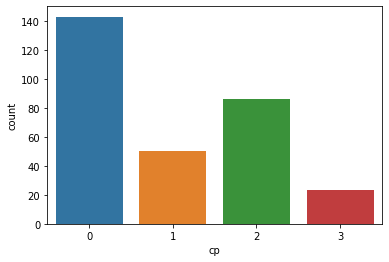

In [13]:
sns.countplot(x="cp", data=df);

<AxesSubplot:xlabel='fbs', ylabel='count'>

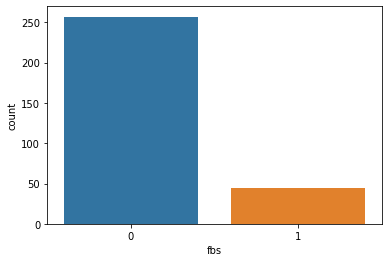

In [14]:
sns.countplot(x="fbs", data=df);

<AxesSubplot:xlabel='restecg', ylabel='count'>

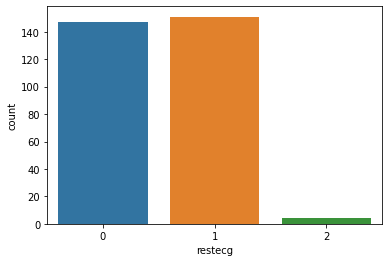

In [15]:
sns.countplot(x="restecg", data=df);

<AxesSubplot:xlabel='exang', ylabel='count'>

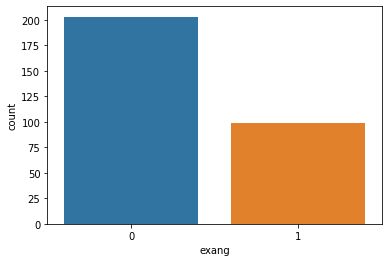

In [16]:
sns.countplot(x="exang", data=df);

<AxesSubplot:xlabel='slope', ylabel='count'>

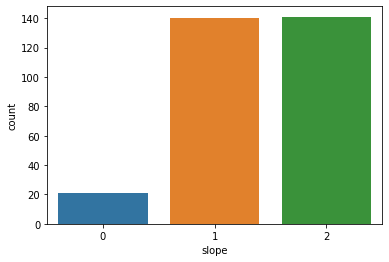

In [17]:
sns.countplot(x="slope", data=df);

<AxesSubplot:xlabel='ca', ylabel='count'>

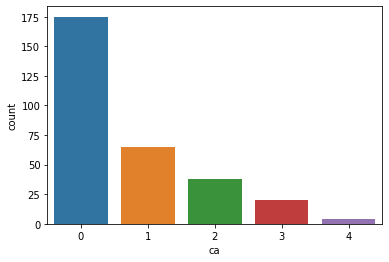

In [18]:
sns.countplot(x="ca", data=df);

<AxesSubplot:xlabel='thal', ylabel='count'>

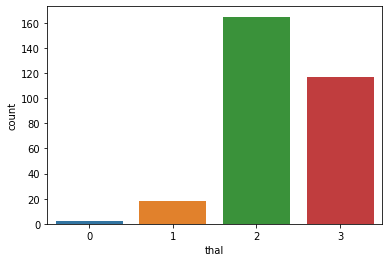

In [19]:
sns.countplot(x="thal", data=df);

# composition of all patients with respect to the Sex category


In [27]:
df_age_cat = df.groupby('sex').size()

In [28]:
df_age_cat

sex
0     96
1    206
dtype: int64

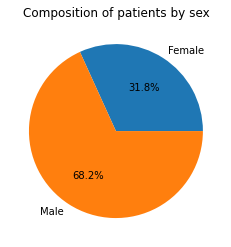

In [29]:
labels = ['Female', 'Male']
plt.pie(df_age_cat.values, labels=labels, autopct='%1.1f%%')
plt.title('Composition of patients by sex')
plt.show()

# f one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient


<AxesSubplot:xlabel='target', ylabel='trestbps'>

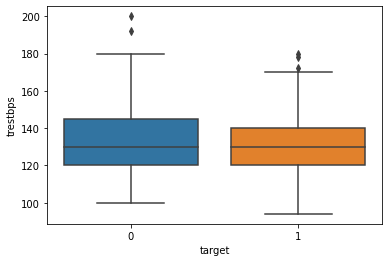

In [32]:
sns.boxplot(x='target', y='trestbps', data=df)

In [37]:
trestbps_hd = df.loc[df['target'] == 1, 'trestbps']
trestbps_no_hd = df.loc[df['target'] == 0, 'trestbps']

t_stat, p_value = sci.ttest_ind(trestbps_hd, trestbps_no_hd)

In [38]:
p_value


0.010926538861949147

Since the p-value is less than the significance level of 0.05, we can reject the null hypothesis and conclude that there is a statistically significant difference in resting blood pressure between patients with and without heart disease.

# relationship between cholesterol levels and a target variable

<AxesSubplot:xlabel='target', ylabel='chol'>

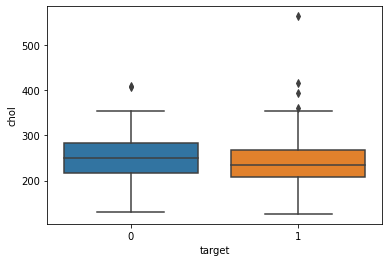

In [39]:
sns.boxplot(x='target', y='chol', data=df)

Patients with heart disease tend to have slightly higher serum cholesterol levels than patients without heart disease. This can be seen in the higher median and upper quartile of the boxplot for the target variable of 1 (heart disease) compared to the target variable of 0 (no heart disease). 

# relationship exists between peak exercising and the occurrence of a heart attack


Text(0, 0.5, 'Heart disease (1 = present, 0 = absent)')

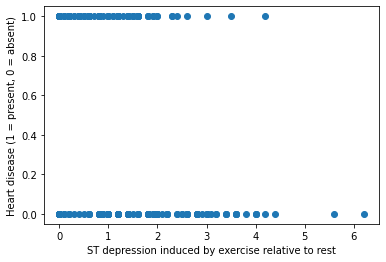

In [40]:
plt.scatter(df['oldpeak'], df['target'])
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('Heart disease (1 = present, 0 = absent)')


There appears to be a negative relationship between oldpeak and the occurrence of heart disease. That is, patients with lower ST depression induced by exercise relative to rest tend to have a higher occurrence of heart disease, while patients with higher ST depression induced by exercise relative to rest tend to have a lower occurrence of heart disease.


# Checking if thalassemia is a major cause of CVD


<AxesSubplot:xlabel='thal', ylabel='count'>

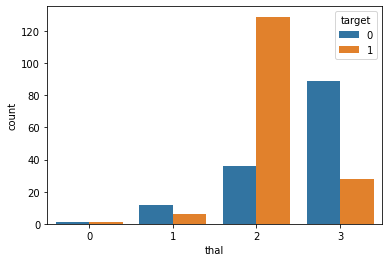

In [41]:
sns.countplot(x='thal', hue='target', data=df)

While these observations suggest that thalassemia type 2 may be associated with a higher risk of CVD, further analysis is needed to determine the strength and direction of this relationship, as well as the relative importance of other risk factors such as age, sex, blood pressure, and cholesterol levels.

# correlation matrix

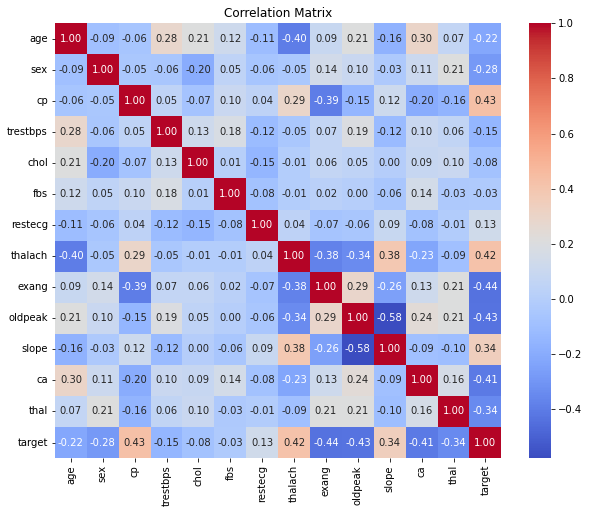

In [72]:
corr = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [73]:
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


# creating pair plot to understand the relationship between all the given variables


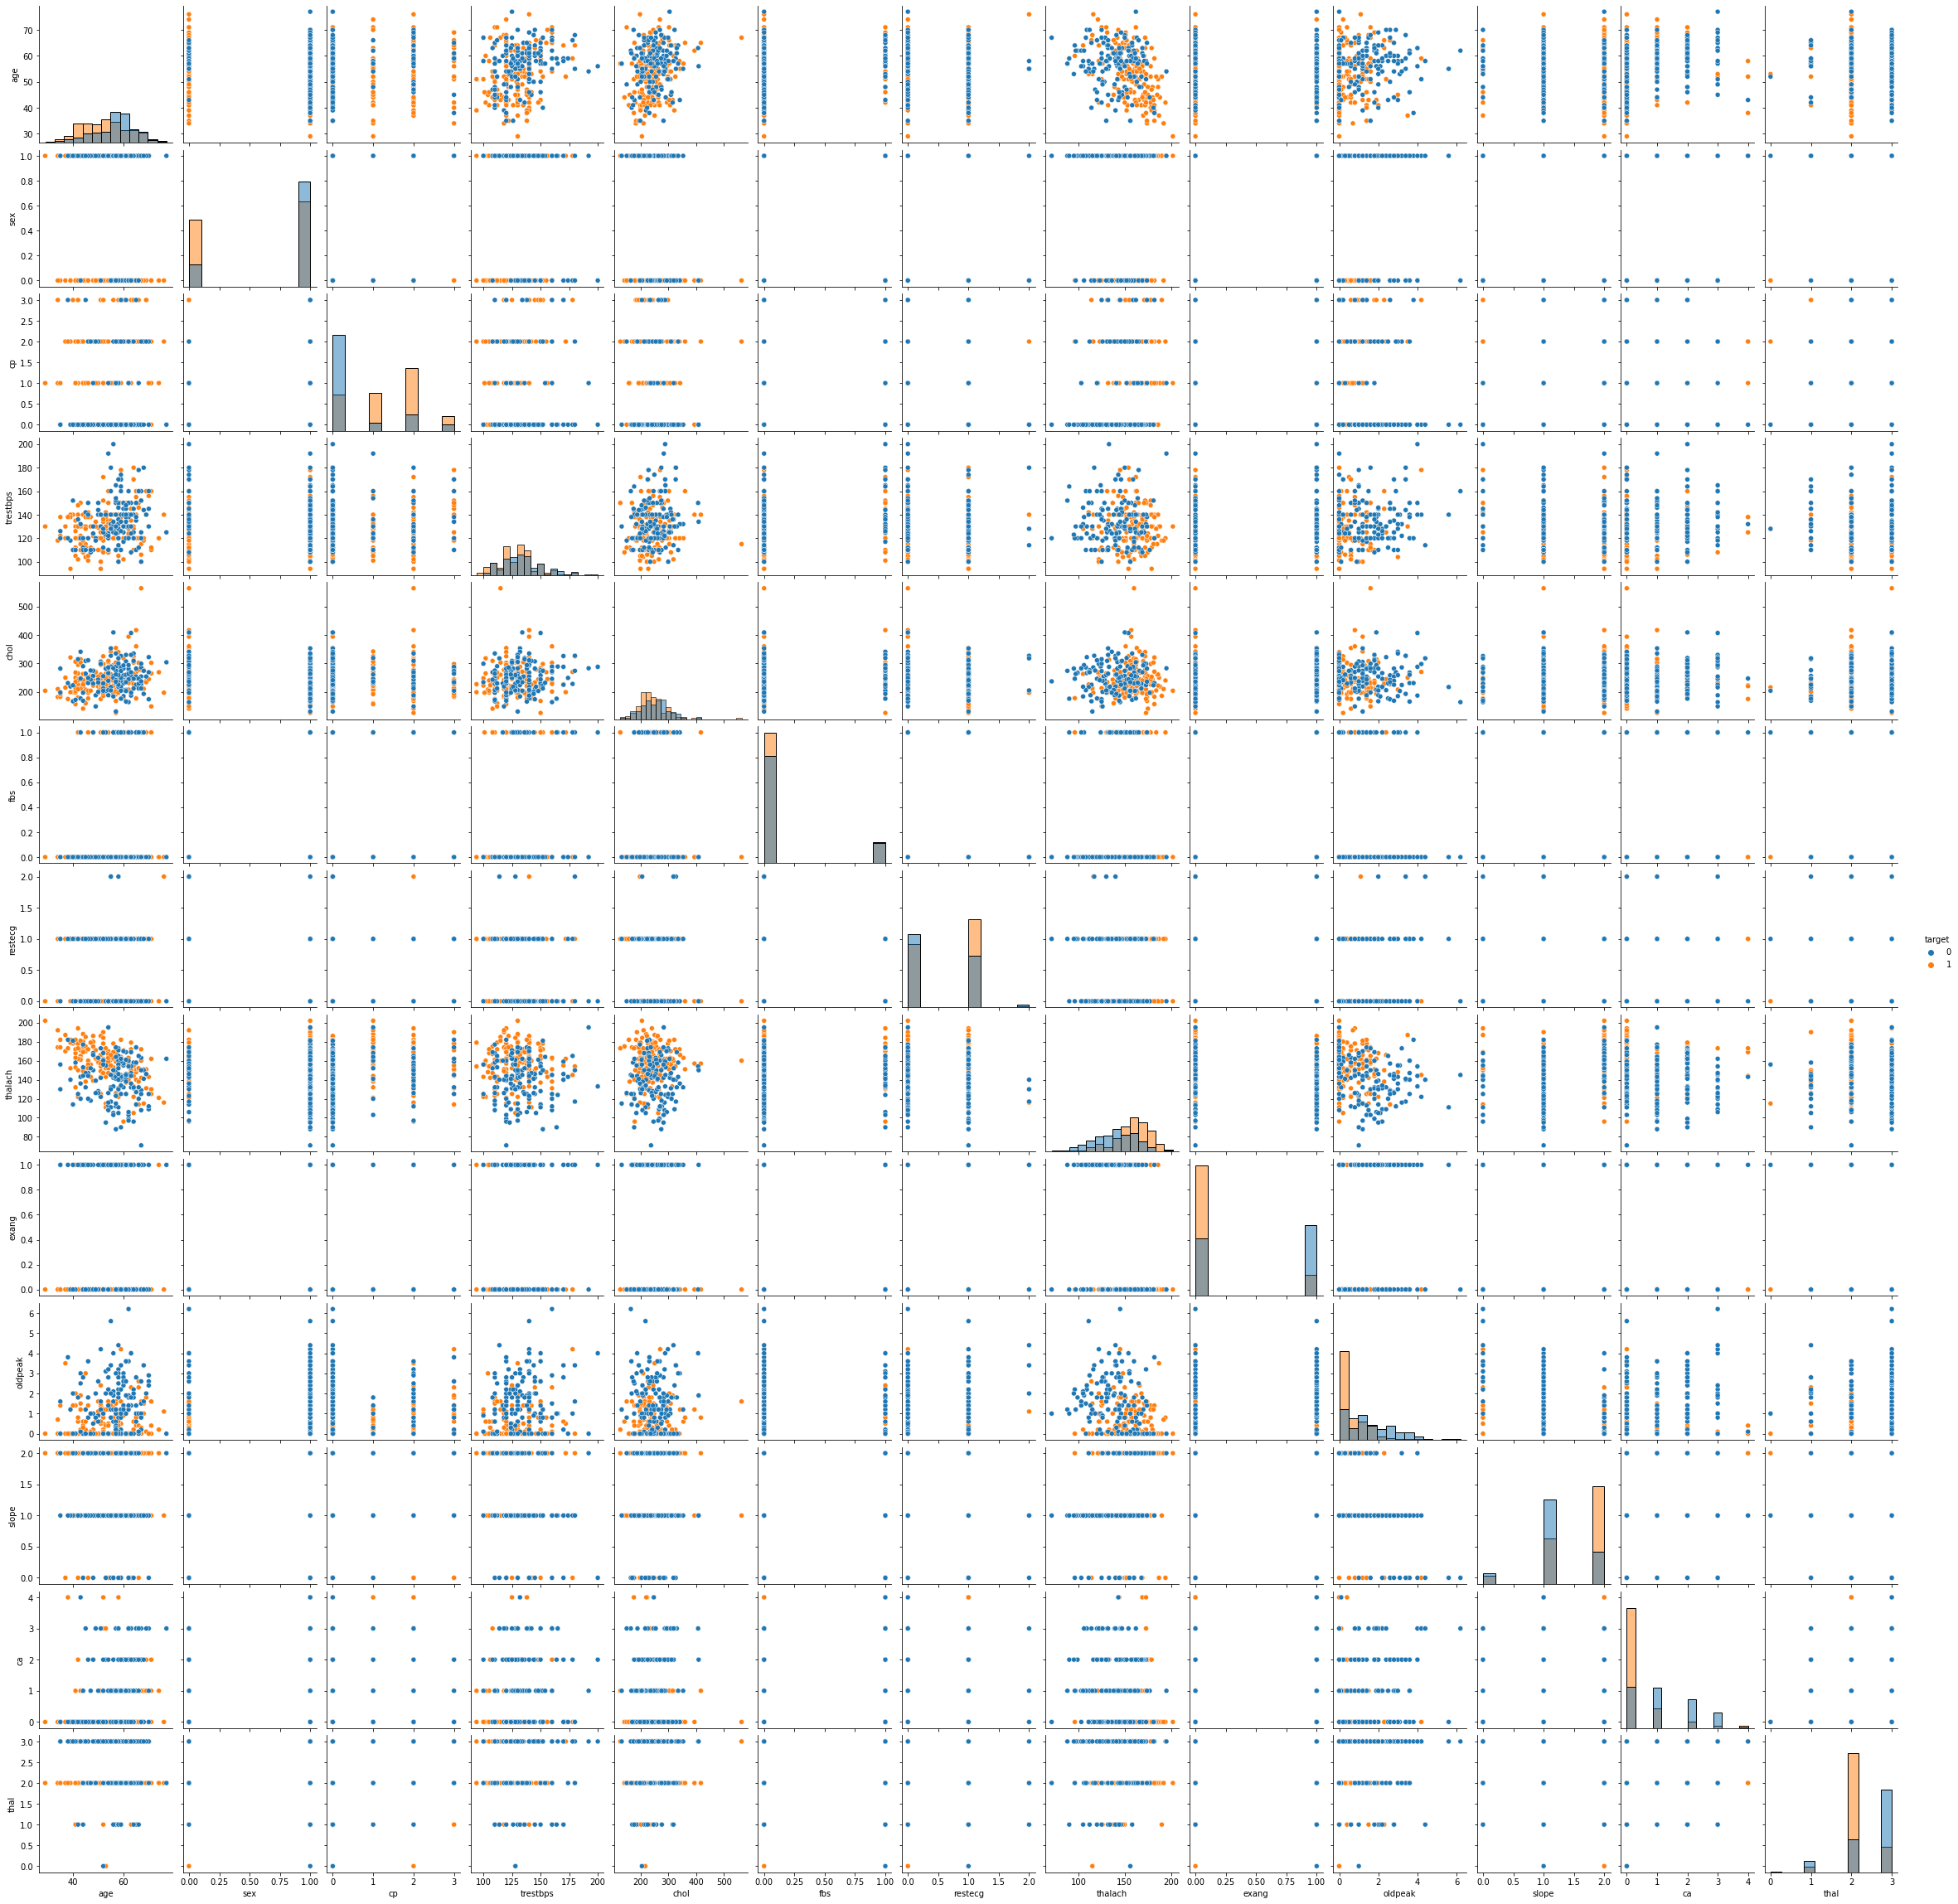

In [75]:
sns.pairplot(df, hue='target', diag_kind='hist')
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import statsmodels.api as sm

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)


# Building a logistic regression model

In [50]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [49]:
lr_pred = lr_model.predict(X_test)

In [56]:
# Accuracy on Test data
accuracy_score(y_test, lr_pred)

0.8524590163934426

In [58]:
# Accuracy on Train data
accuracy_score(y_train, lr_model.predict(X_train))

0.8755186721991701

# Building a random forest classifier

In [59]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
rf_pred = rf_model.predict(X_test)

# Print classification report and confusion matrix for logistic regression model

In [80]:
print('Logistic Regression Results:')
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

[[24  5]
 [ 4 28]]


# Print classification report and confusion matrix for random forest model

In [62]:
print('Random Forest Results:')
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

[[25  4]
 [ 5 27]]


# Performing logistic regression with p-value and standard error for feature selection

In [76]:

logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.347733
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  241
Model:                          Logit   Df Residuals:                      227
Method:                           MLE   Df Model:                           13
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.4950
Time:                        15:21:45   Log-Likelihood:                -83.804
converged:                       True   LL-Null:                       -165.95
Covariance Type:            nonrobust   LLR p-value:                 2.662e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8752      2.924      1.325      0.185      -1.855       9.606
age            0.0028      0.

 based on the p-values, we can see that the "age", "chol", and "fbs" variables have relatively high p-values (above 0.05), indicating that they may not be significant predictors of heart disease risk. On the other hand, variables such as "sex", "cp", "trestbps", "thalach", "exang", "slope", "ca", and "thal" have low p-values (below 0.05), indicating that they may be significant predictors of heart disease risk.

# Building a predictive system

In [69]:
import warnings
in_data = (57,0,0,140,241,0,1,123,1,0.2,1,0,3)

# Changing the input data into a numpy array
in_data_as_numpy_array = np.array(in_data)

# Reshaping the numpy array as we predict it
in_data_reshape = in_data_as_numpy_array.reshape(1,-1)
pred = lr_model.predict(in_data_reshape)
print(pred)

if(pred[0] == 0):
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')

[0]
The person does not have heart disease.
